In [1]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
!pip install ISLP
from ISLP import load_data, confusion_table


In [19]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
roc_curve = RocCurveDisplay.from_estimator
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots,cm
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm

In [3]:
auto = pd.read_csv("C:/Users/kjs/Downloads/op/predictive/hw4/Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
median_mileage = auto['mpg'].median()
auto['above_median'] = (auto['mpg'] > median_mileage).astype(int)
auto['cylinders'] = auto['cylinders'].astype('category')
auto['origin'] = auto['origin'].astype('category')

# Perform one-hot encoding using get_dummies
auto_encoded = pd.get_dummies(auto, columns=['cylinders', 'origin'], drop_first=True)

# Display the modified DataFrame
auto_encoded.head()


,mpg,displacement,horsepower,weight,acceleration,year,name,above_median,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,18.0,307.0,130,3504,12.0,70,chevrolet chevelle malibu,0,0,0,0,1,0,0
1,15.0,350.0,165,3693,11.5,70,buick skylark 320,0,0,0,0,1,0,0
2,18.0,318.0,150,3436,11.0,70,plymouth satellite,0,0,0,0,1,0,0
3,16.0,304.0,150,3433,12.0,70,amc rebel sst,0,0,0,0,1,0,0
4,17.0,302.0,140,3449,10.5,70,ford torino,0,0,0,0,1,0,0


In [5]:
X = auto_encoded.drop(['name', 'mpg', 'above_median'], axis=1)  # Assuming 'above_median' is the target variable
y = auto_encoded['above_median']

In [6]:
np.random.seed(123)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
numerical = ['displacement','horsepower','weight','acceleration']
scaler = StandardScaler()
X[numerical] = scaler.fit_transform(X[numerical])


In [7]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100] 
# cv_errors = []

# for c in cs:
#     svm = SVC(kernel='linear', C=c)
#     scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#     mse = -np.mean(scores)
#     cv_errors.append(mse)
#     print('C=%.2f, CV MSE: %.3f' % (c, mse))
for c in Cs:
    svm = SVC(C=c)
    svm.fit(X, y)
    print("Accuracy for C=", c, ": ", svm.score(X, y))

Accuracy for C= 0.001 :  0.7627551020408163
Accuracy for C= 0.01 :  0.7627551020408163
Accuracy for C= 0.1 :  0.7627551020408163
Accuracy for C= 1 :  0.7882653061224489
Accuracy for C= 10 :  0.9158163265306123
Accuracy for C= 100 :  0.9005102040816326


In [8]:
svm = SVC()

cv_errors = []
for c in Cs:
    svm.C = c
    scores = cross_val_score(svm, X, y, scoring='accuracy', cv=5)
    cv_errors.append(1 - np.mean(scores))
for i in range(len(Cs)):
    print("CV Error for C={}: {}".format(Cs[i], cv_errors[i]))

CV Error for C=0.001: 0.3563777994157741
CV Error for C=0.01: 0.3563777994157741
CV Error for C=0.1: 0.3563777994157741
CV Error for C=1: 0.25761116520610194
CV Error for C=10: 0.18078545926647194
CV Error for C=100: 0.14767932489451474


In [34]:
kfold = skm.KFold(5, 
                  random_state = 0,
                  shuffle=True)
grid = skm.GridSearchCV(svm, 
                        {'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]},
                        refit=True,
                        cv=kfold, 
                        scoring='accuracy')
grid.fit(X,y)

# what's the best model?
grid.best_params_

{'C': 10}

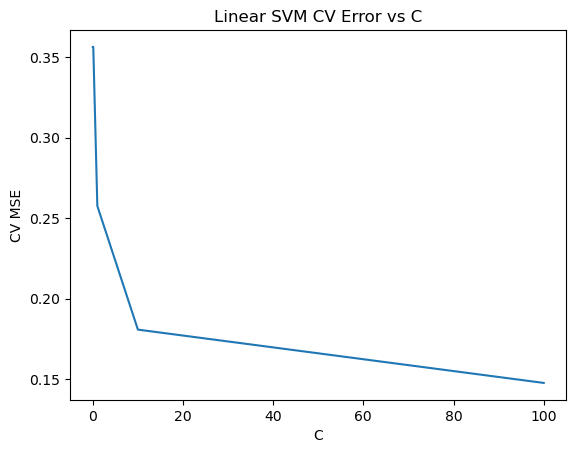

In [9]:
plt.plot(Cs, cv_errors)
plt.xlabel('C')
plt.ylabel('CV MSE')
plt.title('Linear SVM CV Error vs C')
plt.show()

In [10]:
gamma_values = [0.1, 1, 10]
degree_values = [2, 3, 4]

# Radial Basis Kernel (RBF)
kernel_rbf = 'rbf'
for C in Cs:
    for gamma in gamma_values:
        svc_rbf = SVC(kernel=kernel_rbf, C=C, gamma=gamma, random_state=42)
        cv_scores_rbf = cross_val_score(svc_rbf, X, y, cv=5, scoring='accuracy')
        print(f"Kernel={kernel_rbf}, C={C}, Gamma={gamma}: Mean Accuracy = {cv_scores_rbf.mean():.4f}, Std Dev = {cv_scores_rbf.std():.4f}")

# Polynomial Kernel
kernel_poly = 'poly'
for C in Cs:
    for degree in degree_values:
        svc_poly = SVC(kernel=kernel_poly, C=C, degree=degree, random_state=42)
        cv_scores_poly = cross_val_score(svc_poly, X, y, cv=5, scoring='accuracy')
        print(f"Kernel={kernel_poly}, C={C}, Degree={degree}: Mean Accuracy = {cv_scores_poly.mean():.4f}, Std Dev = {cv_scores_poly.std():.4f}")


Kernel=rbf, C=0.001, Gamma=0.1: Mean Accuracy = 0.6282, Std Dev = 0.1474
Kernel=rbf, C=0.001, Gamma=1: Mean Accuracy = 0.5693, Std Dev = 0.0770
Kernel=rbf, C=0.001, Gamma=10: Mean Accuracy = 0.4949, Std Dev = 0.0048
Kernel=rbf, C=0.01, Gamma=0.1: Mean Accuracy = 0.6282, Std Dev = 0.1474
Kernel=rbf, C=0.01, Gamma=1: Mean Accuracy = 0.5693, Std Dev = 0.0770
Kernel=rbf, C=0.01, Gamma=10: Mean Accuracy = 0.4949, Std Dev = 0.0048
Kernel=rbf, C=0.1, Gamma=0.1: Mean Accuracy = 0.7886, Std Dev = 0.1192
Kernel=rbf, C=0.1, Gamma=1: Mean Accuracy = 0.5791, Std Dev = 0.0430
Kernel=rbf, C=0.1, Gamma=10: Mean Accuracy = 0.4949, Std Dev = 0.0048
Kernel=rbf, C=1, Gamma=0.1: Mean Accuracy = 0.7809, Std Dev = 0.1288
Kernel=rbf, C=1, Gamma=1: Mean Accuracy = 0.7272, Std Dev = 0.0824
Kernel=rbf, C=1, Gamma=10: Mean Accuracy = 0.5077, Std Dev = 0.0427
Kernel=rbf, C=10, Gamma=0.1: Mean Accuracy = 0.7783, Std Dev = 0.1191
Kernel=rbf, C=10, Gamma=1: Mean Accuracy = 0.7068, Std Dev = 0.0719
Kernel=rbf, C=10, G

In [35]:
# Question 6 - Generate plots
svm_best = SVC(kernel='linear', C=10)
svm_best = svm.fit(X, y)
svm_best_rbf = SVC(kernel='rbf', C=100, gamma = 0.1)
svm_best_rbf = svm.fit(X, y)
svm_best_poly = SVC(kernel='poly', C=100, degree = 2)
svm_best_poly = svm.fit(X, y)


C:\Users\kjs\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


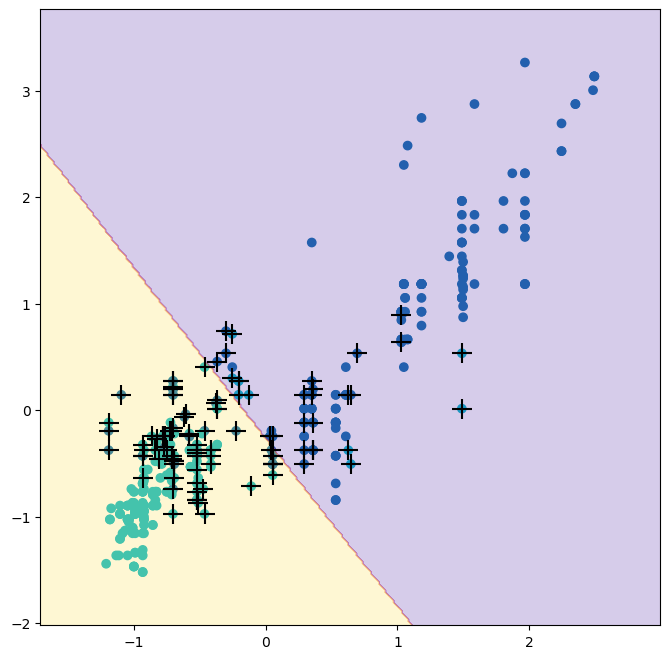

In [37]:
# Decision boundary plot
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y, svm_best, ax=ax)

C:\Users\kjs\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


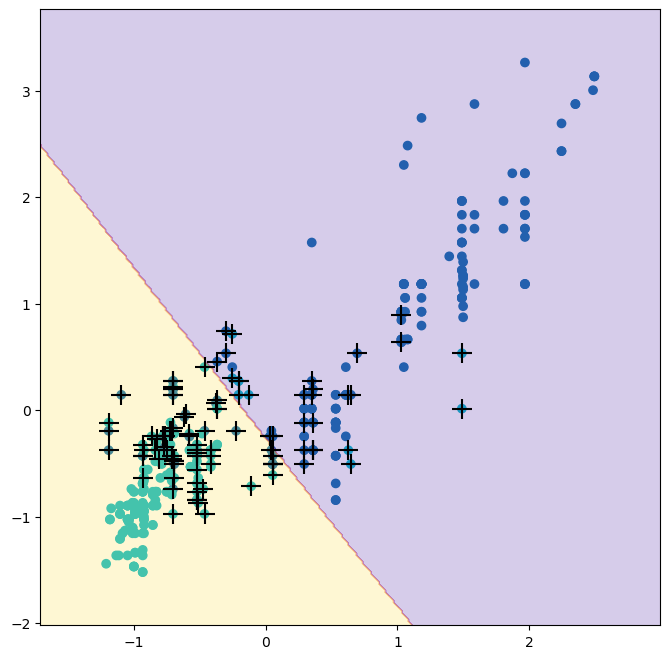

In [38]:
# Decision boundary plot
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y, svm_best_rbf, ax=ax)

C:\Users\kjs\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


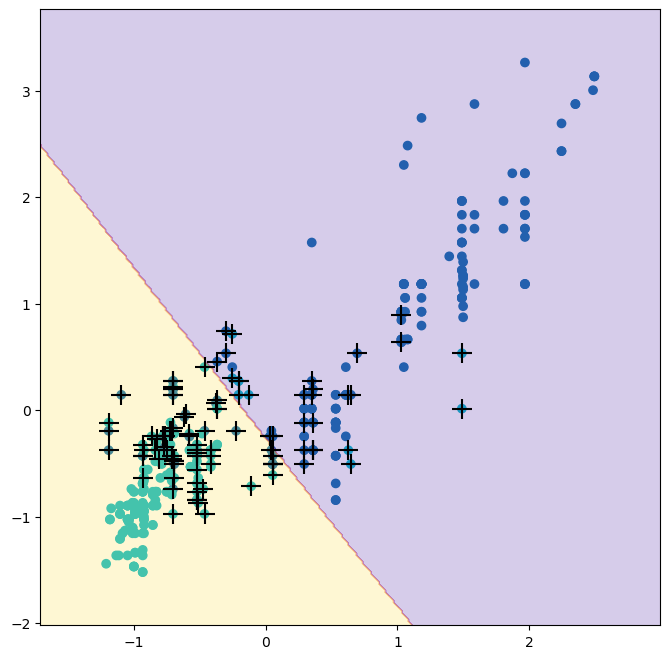

In [39]:
# Decision boundary plot
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y, svm_best_poly, ax=ax)